# Support Vector Machines (SVM) - Classification for Social Network Ads

In [1]:
url = 'https://raw.githubusercontent.com/LawXie/Portfolio/master/Datasets/Social_Network_Ads.csv'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(url)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

It seems that the target variable is relatively balanced!

In [6]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [7]:
df.drop('User ID',axis=1, inplace=True)
df = pd.get_dummies(df, drop_first=True)

In [8]:
df.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Male'], dtype='object')

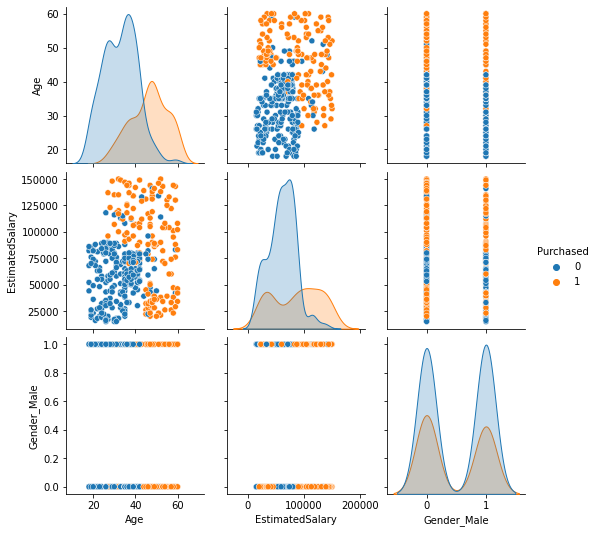

In [9]:
sns.pairplot(df, hue='Purchased')

In [10]:
#Scaling the features
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_sc= scaler.fit_transform(df)

In [11]:
df_sc = pd.DataFrame(df_sc, columns=df.columns)
df_sc.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,-1.781797,-1.490046,-0.745936,1.020204
1,-0.253587,-1.460681,-0.745936,1.020204
2,-1.113206,-0.785290,-0.745936,-0.980196
3,-1.017692,-0.374182,-0.745936,-0.980196
4,-1.781797,0.183751,-0.745936,1.020204


In [12]:
df_sc['Gender_Male']=df['Gender_Male']
df_sc['Purchased']=df['Purchased']

In [13]:
df_sc.describe()

,Age,EstimatedSalary,Purchased,Gender_Male
count,4.000000e+02,4.000000e+02,400.000000,400.000000
mean,-7.105427e-17,-1.776357e-17,0.357500,0.490000
std,1.001252e+00,1.001252e+00,0.479864,0.500526
min,-1.877311e+00,-1.607506e+00,0.000000,0.000000
25%,-7.550313e-01,-7.852897e-01,0.000000,0.000000
50%,-6.256110e-02,7.561451e-03,0.000000,0.000000
75%,7.970571e-01,5.361289e-01,1.000000,1.000000
max,2.134241e+00,2.356750e+00,1.000000,1.000000


In [14]:
#Defining the variables and splitting the data
y = df_sc['Purchased']
X = df_sc.drop('Purchased', axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Fitting SVM Classifier to the Training set
from sklearn.svm import SVC
SVMC = SVC()
SVMC.fit(X_train, y_train)
y_pred = SVMC.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score

#f1 score
print('F1 score : {}'.format(round(f1_score(y_test,y_pred),3)))

#accuracy score
print('Accuracy score : {}'.format(round(accuracy_score(y_test,y_pred),3)))

#confusion matrix
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test, y_pred)))

#classification report
print(classification_report(y_test, y_pred))

F1 score : 0.897
Accuracy score : 0.925
Confusion matrix : 
[[48  4]
 [ 2 26]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



**Tuning hyperparameters:**

**Gridsearch**
Trying out all the possible combinations by Gridsearch. Scikit-learn has this functionality built as GridSearchCV. It takes a dictionary that describes the parameters. Once ran, we will find optimized parameters.

 - C represents cost of misclassification 
 - Gamma is the free prameter in the radial basis function (rbf), inverse of variance, defines how far the influence of a single training example.

In [18]:
from sklearn.model_selection import GridSearchCV

my_param_grid = {'C': [0.1,10,100,1000], 'gamma': ['scale',0.1,0.01,0.001], 'kernel': ['rbf']}

grid = GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=2, cv=5, n_jobs=-1)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 10, 100, 1000],
                         'gamma': ['scale', 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [20]:
grid.best_params_

{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}

In [21]:
#Best model with optimal parameters
SVMC = SVC(C=10, gamma='scale')
SVMC.fit(X_train, y_train)
y_pred = SVMC.predict(X_test)

In [22]:
#f1 score
print('F1 score : {}'.format(round(f1_score(y_test,y_pred),3)))

#accuracy score
print('Accuracy score : {}'.format(round(accuracy_score(y_test,y_pred),3)))

#confusion matrix
print('Confusion matrix : \n{}'.format(confusion_matrix(y_test, y_pred)))

#classification report
print(classification_report(y_test, y_pred))

F1 score : 0.915
Accuracy score : 0.938
Confusion matrix : 
[[48  4]
 [ 1 27]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        52
           1       0.87      0.96      0.92        28

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80



94% accuracy on relatively balance dataset makes this model fairly accurate. 